In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (15, 8)})

In [2]:
df = pd.read_csv('reddit_comments_new.csv')

In [3]:
df

,Post_Id,Subreddit,Post_Title,Post_Body,Comment,Upvotes,Downvotes,Comment_Created,Flair
0,14ohevh,mentalhealth,TW (s******): Bipolar Disorder?,"So, I'm not too sure how psychologists work, b...",I'm not sure if this is bipolar but I have had...,1,0,2023-07-02 03:21:19,Opinion / Thoughts
1,14oh8jm,mentalhealth,Could you share some music (preferably instrum...,"\r \n Hi, I have a history of trauma and PTSD...",It's not instrumental but the kooks inside in/...,1,0,2023-07-02 03:01:19,Question
2,14ogtgq,mentalhealth,Just looking for some constructive help,Just looking for an opinion.\n\nM 33. Ok so af...,Most likely if you're drinking while taking yo...,2,0,2023-07-02 02:28:38,Need Support
3,14ogtgq,mentalhealth,Just looking for some constructive help,Just looking for an opinion.\n\nM 33. Ok so af...,It's rough. I'm about 2 weeks into Fluoxetine ...,1,0,2023-07-02 02:42:23,Need Support
4,14ogqjj,mentalhealth,Is 180cm a good height for a man?,I can't stop thinking about it and it makes me...,Absolutely. The best part is you fit in almost...,1,0,2023-07-02 02:20:19,Opinion / Thoughts
...,...,...,...,...,...,...,...,...,...
10459,bl8sx2,AdultDepression,Waking up everyday,I don’t want to wake up. \n\nSometimes I’d hav...,I feel you! I often just sob. Someone sugges...,5,0,2019-05-06 07:50:51,Rant
10460,bkbqbz,AdultDepression,No hope,"Even if my depression magically lifted, I woul...",You're struggling to do anything with your lif...,4,0,2019-05-03 14:43:26,NaN
10461,bk6zql,AdultDepression,"You know, I know they mean well, but can anyon...",NaN,I relate. Well I used to hate it when people ...,13,0,2019-05-03 07:41:59,NaN
10462,bk6zql,AdultDepression,"You know, I know they mean well, but can anyon...",NaN,"Everyone’s different, some people are depresse...",7,0,2019-05-03 08:45:11,NaN


### Handling the null values.

In [4]:
# Drop duplicate records
df = df.drop_duplicates()
# Check the number of duplicate records after cleaning
print(df.duplicated().sum())

0


In [5]:
print(df.isnull().mean()) 

Post_Id            0.000000
Subreddit          0.000000
Post_Title         0.000000
Post_Body          0.027345
Comment            0.000000
Upvotes            0.000000
Downvotes          0.000000
Comment_Created    0.000000
Flair              0.469357
dtype: float64


In [6]:
# Since only 2% post body is empty, we will simply drop entries with empty post body
df = df.dropna(subset=['Post_Body'])

In [7]:
# We have 46% empty flair so we will set empty flairs as 'no_flair'
df['Flair'].fillna('no_flair', inplace=True)

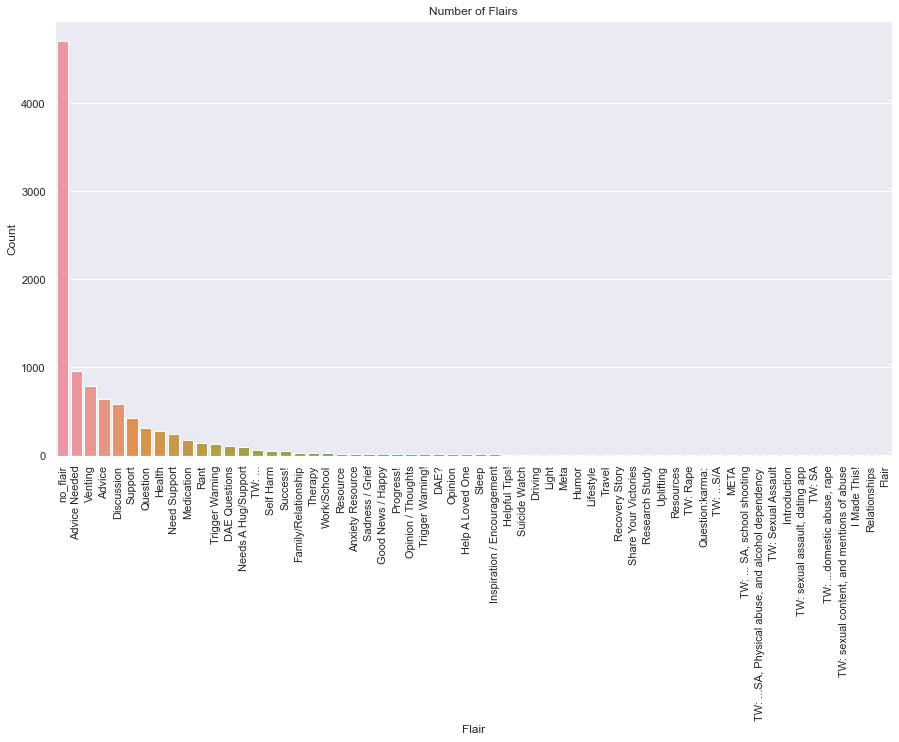

In [8]:
flair_counts = df['Flair'].value_counts()
sns.barplot(x=flair_counts.index, y=flair_counts.values)
plt.xlabel('Flair')
plt.ylabel('Count')
plt.title('Number of Flairs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [9]:
top_flairs = df['Flair'].value_counts().nlargest(15).sort_values(ascending=False).index
df = df[df['Flair'].isin(top_flairs)]

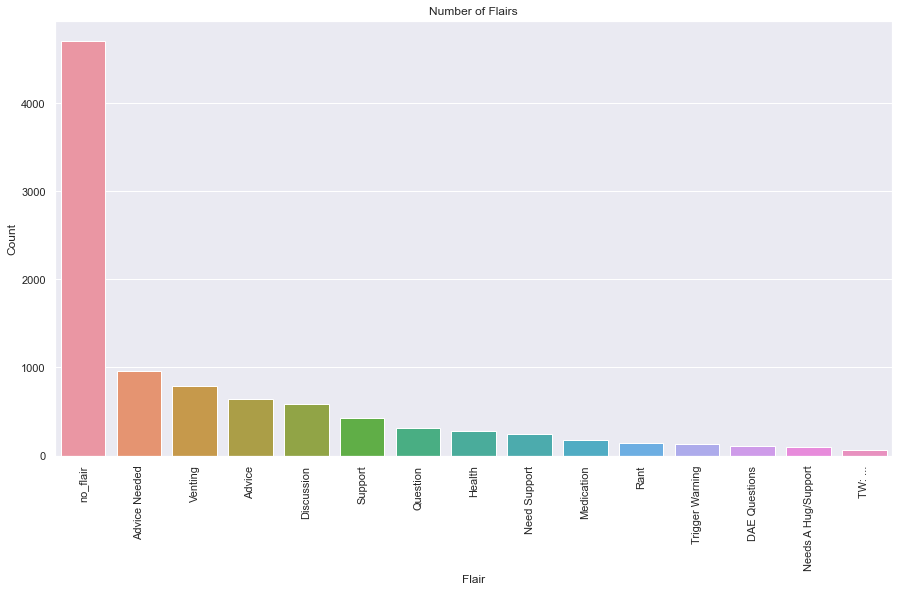

In [10]:
flair_counts = df['Flair'].value_counts()
sns.barplot(x=flair_counts.index, y=flair_counts.values)
plt.xlabel('Flair')
plt.ylabel('Count')
plt.title('Number of Flairs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [11]:
df['Upvotes'].unique()

array(['1', '2', '3', '5', '0', '6', '38', '31', '21', '9', '4', '8', '7',
       '10', '23', '11', '12', '16', '15', '14', '55', '37', '22', '42',
       '50', '18', '46', '-1', '60', '25', '58', '35', '27', '13', '82',
       '34', '29', '20', '99', '97', '94', '24', '148', '57', '-3', '248',
       '79', '71', '40', '26', '28', '19', '53', '81', '76', '143', '36',
       '33', '30', '66', '32', '17', '-23', '45', '43', '52', '51', '64',
       '48', '63', '56', '47', '62', '49', '54', '73', '39', '198', '146',
       '114', '41', '117', '69', '92', '44', '-4', '88', '77', '87', '65',
       '-2'], dtype=object)

In [12]:
df['Downvotes'].unique()

array(['0'], dtype=object)

In [13]:
df.drop('Downvotes', axis=1, inplace=True)

In [14]:
# Convert 'Upvotes' and 'Downvotes' columns to numeric
df.loc[:, 'Upvotes'] = pd.to_numeric(df['Upvotes'], errors='coerce')

# Check the data types after conversion
print(df.dtypes)

Post_Id            object
Subreddit          object
Post_Title         object
Post_Body          object
Comment            object
Upvotes             int64
Comment_Created    object
Flair              object
dtype: object


In [15]:
df = df.dropna(subset=['Upvotes'])
df.isnull().mean()

Post_Id            0.0
Subreddit          0.0
Post_Title         0.0
Post_Body          0.0
Comment            0.0
Upvotes            0.0
Comment_Created    0.0
Flair              0.0
dtype: float64

In [16]:
df.shape

(9651, 8)

#### We currently have a dataset consisting of 9651 entries. To preserve our cleaned data, we will save it as a new file named "reddit_comment_cleaned.csv".

In [17]:
df.to_csv('datasets/reddit_comments_cleaned.csv', index=False)